In [1]:
#NishiSolanki.
#Classification: kNN.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#Importing dataset from desktop's csv file.
data = pd.read_csv("Enterococcus_faecalis_Infection_Data.csv")
data = data.iloc[1:]

#Remove any NaN values from dataset before taking train_test_split.
data.dropna(inplace=True)

In [4]:
#Data is not relevant to final models, concluded after considering accuracy scores with/without particular columns.
data = data.drop('SevenDay_Death', axis=1)
data = data.drop('ThirtyDay_Death', axis=1)
data = data.drop('SixWeek_Death', axis=1)
data = data.drop('ThreeMo_Death', axis=1)
data = data.drop('SixMo_Death', axis=1)
data = data.drop('NineMo_Death', axis=1)

In [5]:
data["OneYear_Death"] = data["OneYear_Death"].astype(int)

In [6]:
#Replacing the range of data in AGE_GRP as averages. Helps with data processing in ML models.
data.replace(to_replace ="00-10", value = "5", inplace = True)
data.replace(to_replace ="11-20", value = "15.5", inplace = True)
data.replace(to_replace ="21-30", value = "25.5", inplace = True)
data.replace(to_replace ="31-40", value = "35.5", inplace = True)
data.replace(to_replace ="41-50", value = "45.5", inplace = True)
data.replace(to_replace ="51-60", value = "55.5", inplace = True)
data.replace(to_replace ="61-70", value = "65.5", inplace = True)
data.replace(to_replace ="71-80", value = "75.5", inplace = True)
data.replace(to_replace ="81-90", value = "85.5", inplace = True)
data.replace(to_replace ="80+", value = "80", inplace = True)

del data['Unnamed: 0']

In [7]:
#Assigning features to X and target to y, setting target as "OneYear_Death".

X=data.loc[:,data.columns!="OneYear_Death"]
y = data['OneYear_Death']

In [8]:
#Splitting testing and training data.
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
#Classification kNN: Using coding example from class, and scikit_learn.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

#Standardizing data to mean, and common variance for kNN.
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

#Implementing model for kNN.
kNN = KNeighborsClassifier(n_neighbors=40)
kNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [12]:
#Training model with train dataset.
y_pred_train = kNN.predict(x_train)

In [13]:
y_pred_test = kNN.predict(x_test)
#Accuracy score and f1 score for training and testing.
print("Accuracy_Train:", accuracy_score(y_train[:369], y_pred_train[:369]))
print ("f1_score_train:", f1_score(y_train[:369], y_pred_train[:369]))

print("Accuracy_Test:", accuracy_score(y_test, y_pred_test)) 
print ("f1_score_test:", f1_score(y_test, y_pred_test))

Accuracy_Train: 0.6504065040650406
f1_score_train: 0.015267175572519085
Accuracy_Test: 0.7235772357723578
f1_score_test: 0.01923076923076923


<AxesSubplot:>

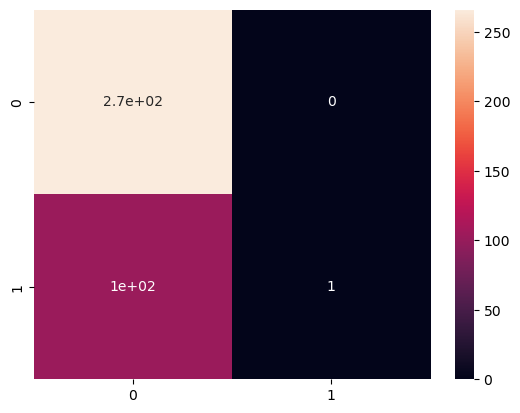

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True)

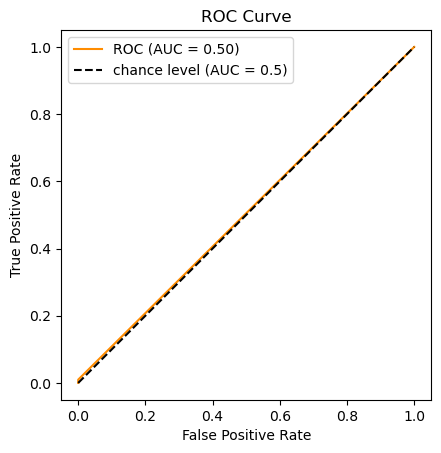

AUC_score: 0.5048543689320388


In [15]:
#ROC curve.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_test,name="ROC", color="darkorange")

plt.plot([0, 1], [0, 1], "k--", label= "chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

auc = roc_auc_score(y_test, y_pred_test)
print("AUC_score:",auc)